# Best Advertising Markets for e-learning

The premise for this project is that of a e-learning company looking to invest money in advertising. Mainly offering courses on web and mobile development, the company also covers domains like data science, game development, etc. 

The main goal of this project is to determine which are the best two markets in which to advertise our product.

We could organize surveys for different markets to understand which would be best for advertising. However, this would be very costly and we will first look into finding a cheaper solution. Existing surveys may be relevant to our analysis. The candidate we will explore is data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/). A free online learning platform that offers courses on web development, freeCodeCamp also runs a popular Medium publication and their survey received reposnses from new coders in a wide variety of fields. 

The data from this survey can be found in this [GitHub Repo](https://github.com/freeCodeCamp/2017-new-coder-survey).


In [482]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [483]:
# Read csv file
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', dtype={17: str, 62: str})

In [484]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [485]:
survey.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 136 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    Age                            15367 non-null  float64
 1    AttendedBootcamp               17709 non-null  float64
 2    BootcampFinish                 1069 non-null   float64
 3    BootcampLoanYesNo              1079 non-null   float64
 4    BootcampName                   949 non-null    object 
 5    BootcampRecommend              1073 non-null   float64
 6    ChildrenNumber                 2314 non-null   float64
 7    CityPopulation                 15354 non-null  object 
 8    CodeEventConferences           1609 non-null   float64
 9    CodeEventDjangoGirls           165 non-null    float64
 10   CodeEventFCC                   1708 non-null   float64
 11   CodeEventGameJam               290 non-null    float64
 12   CodeEventGirlDev              

## 1. First Look and Analysis Questions
On first evaluation, the freeCodeCamp survey dataset has 18,175 rows and 136 columns. There are no columns without `NaN` values. The dataset contains information on:
* the age of the respondents 
* whether they attended a coding bootcamp or not 
* whether they finished the bootcamp 
* whether they took a loan for the bootcamp 
* the type of online resources they used (including different online learning platforms and YouTube/self-learning) 
* current employment information, desired job title 
* and much more. 

The dataset will be useful for answering our marketing questions without having to conduct a large-scale survey of our own.

### 1.1 Analysis Questions
As mentioned above, our company creates online learning content focused mainly on web and mobile development. However, we also produce content for other fields like data science, game development, etc. We are interested in answering questions about a population of new coders. We want to understand:
* Where new coders are located.
* Where are the locations with the most new coders.
* How much money new coders are willing to spend on learning.

Before we analyze the sample data in the freeCodeCamp survey, we need to verify that these data are representative for our population of interest and it has the right categories of people for our interest. 


### 1.2 Verify Data for population of interest
In order to understand whether these data are representative of the population we are interested in (new coders with varied fields of interest), we will look into the `JobRoleInterest` column. The column describes the job role(s) every participant is interested in working. First, we will generate a frequency table for the column. Then we will use that table to look into the following questions:
1. Are people interested in only one subject or they can be interested in more than one subject?
2. If most people are interested in more than one subject, is this sample still representative?
3. The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?

/var/folders/7z/wvq3201d0n58khft3ln7ks9w0000gn/T/ipykernel_25375/280768645.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  jobs_freq.index = jobs_freq.index.str.strip().str.replace(r"\s+", " ")


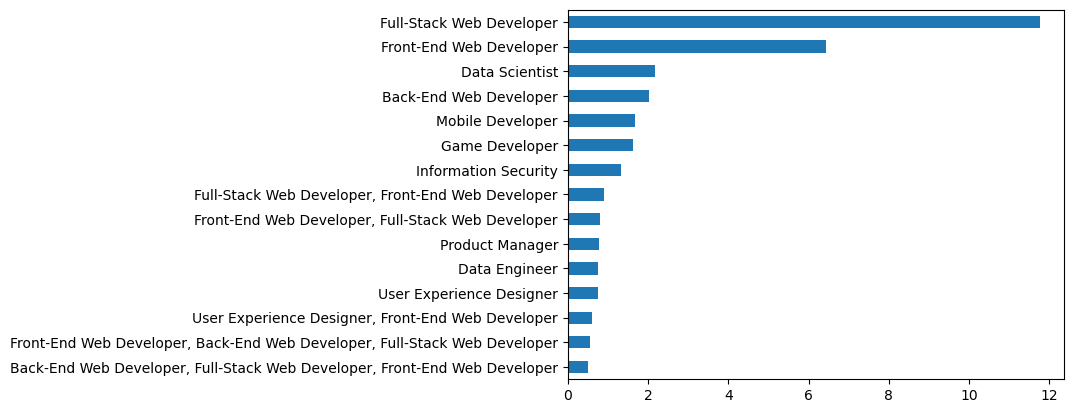

In [486]:
# Generate frequency distribution for JobRoleInterest (in percent)
jobs_freq = survey['JobRoleInterest'].value_counts(normalize=True) * 100
jobs_freq.index = jobs_freq.index.str.strip().str.replace(r"\s+", " ")
jobs_freq.iloc[:15].sort_values().plot.barh()
plt.show()

In [487]:
jobs_freq.head(20)

Full-Stack Web Developer                                                     11.770595
Front-End Web Developer                                                       6.435927
Data Scientist                                                                2.173913
Back-End Web Developer                                                        2.030892
Mobile Developer                                                              1.673341
Game Developer                                                                1.630435
Information Security                                                          1.315789
Full-Stack Web Developer, Front-End Web Developer                             0.915332
Front-End Web Developer, Full-Stack Web Developer                             0.800915
Product Manager                                                               0.786613
Data Engineer                                                                 0.758009
User Experience Designer                   

In [488]:
# Find percent of respondents interested in web or mobile development

area_of_interest = r'\s?,?(\bFull\-Stack Web Developer\b)|(\bFront\-End Web Developer\b)|(\bBack\-End Web Developer\b)|(\bMobile Developer\b),?\s?'
web_mobile_perc = jobs_freq[jobs_freq.index.str.contains(area_of_interest)]
total_web_mobile = web_mobile_perc.sum()
print(total_web_mobile)

86.24141876430205


/var/folders/7z/wvq3201d0n58khft3ln7ks9w0000gn/T/ipykernel_25375/3186989091.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  web_mobile_perc = jobs_freq[jobs_freq.index.str.contains(area_of_interest)]


In [489]:
# Split JobRoleInterest column into list of strings to find number of respondents interested in multiple fields

job_interest = survey['JobRoleInterest'].dropna()
job_interest = job_interest.str.strip().str.replace(r"\s+", " ").str.split(", ")
jbool = job_interest.str.len() > 1
print(jbool.sum())

4779


/var/folders/7z/wvq3201d0n58khft3ln7ks9w0000gn/T/ipykernel_25375/3620808690.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  job_interest = job_interest.str.strip().str.replace(r"\s+", " ").str.split(", ")


Now that we have a frequency table for the `JobsRoleInterest` column (the top 15 responses at least), we can look into the questions posed. 
1. Are people interested in only one subject or they can be interested in more than one subject?
    * Some respondents are interested in only one subject, but 4779 of those that responded to this question are interested in multiple subjects.
2. If most people are interested in more than one subject, is this sample still representative?
    * The sample can still be representative if most respondents are interested in more than one subject. The population of interest is new coders interested in subjects our online learning platform produces content for. As we produce content for multiple subjects, people interested in different subjects fit into our target population. 
3. The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?
    * Of respondents that filled out this question on the survey, 86.24% selected at least one of the two fields of web or mobile development.

This sample of respondents reflects new coders interested primarily in web or mobile development, but not limited to those subjects exclusively. As our imaginary company focuses primarily on those two subject with others included, these data are a reasonable sample of the population we expect to be intertested in our products. 

Now that we have verified this sample will suit our analysis purposes, we will begin answering the questions we posed in section 1.1.

## 2. Market Analysis

### 2.1 Location Analysis
To start our analysis, we will focus on the first two questions posed in section 1.1:
* Where are new coders located?
* Where are the locations with the most new coders?

The fCC dataset provides two columns `CountryCitizen` and `CountryLive` with information on the countries respondents are citizens of and currently reside in. We are interested in the current residence of respondents for advertising purposes. As we only have information at the country level, we will think of countries as individual markets. 

As one indicator of a good market is the number of potential customers, we will focus on finding the countries in which the most respondents reside using the `CountryLive` column.

To ensure that we are using a representative sample, we will drop the rows in `survey` where respondents did not select a job interest. 

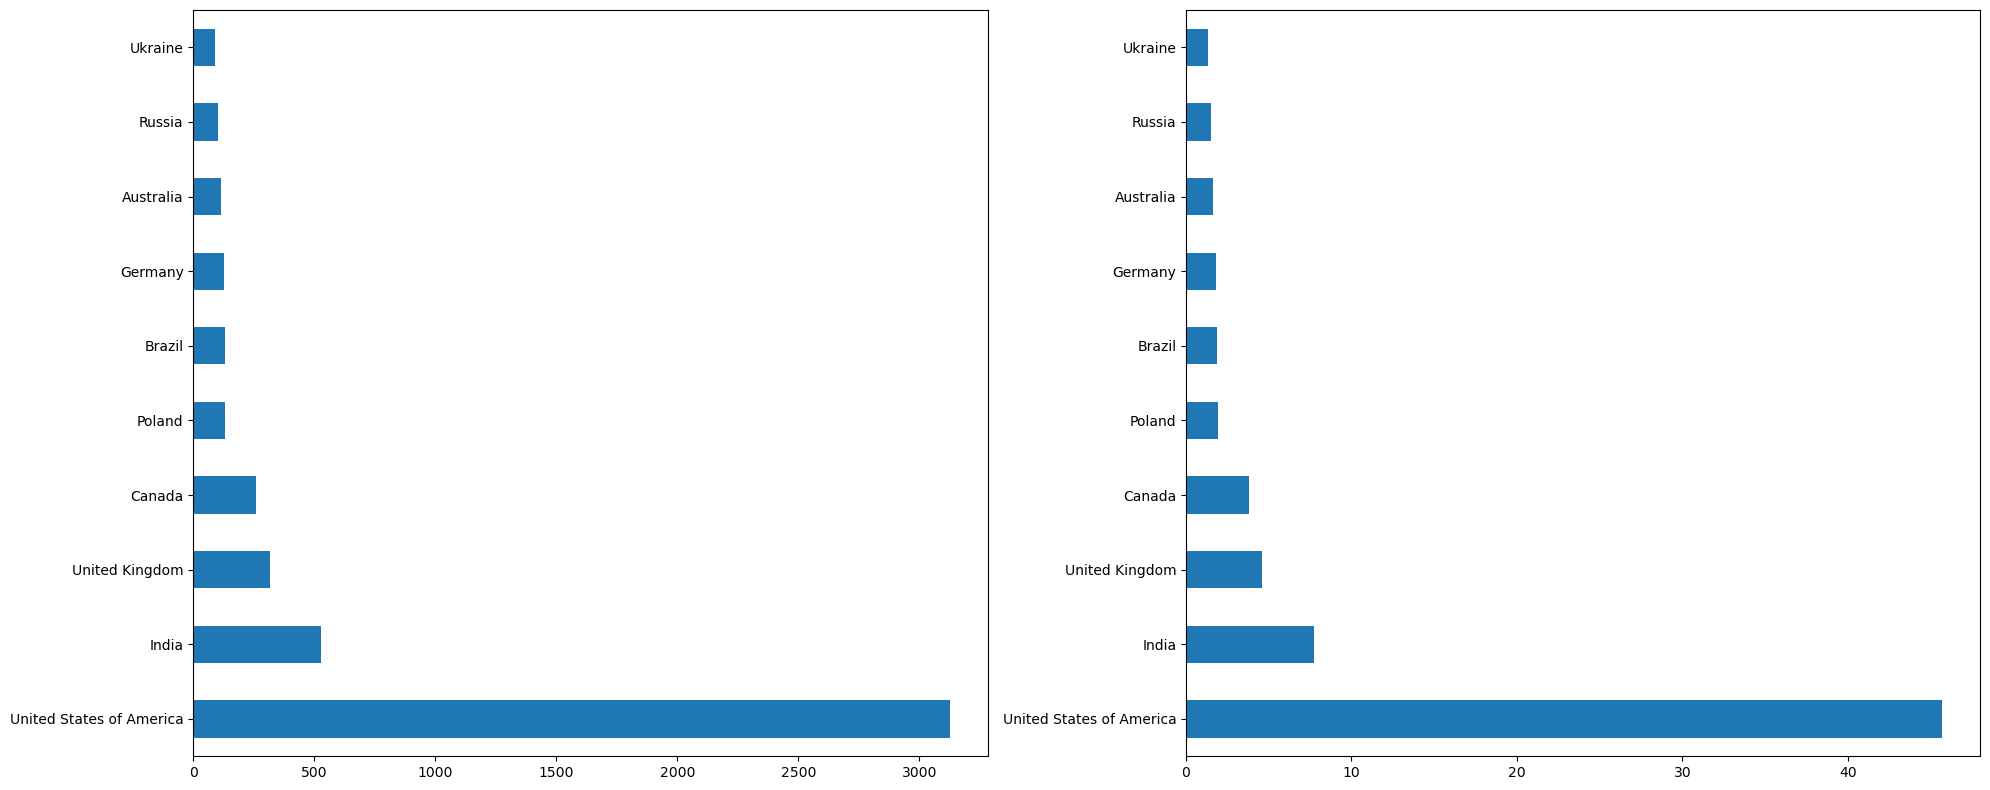

The largest market is United States of America with 3125 respondents.
The second largest market is India with 528 respondents.
The third largest market is United Kingdom with 315 respondents.
The fourth largest market is Canada with 260 respondents.


In [490]:
# Drop rows with null values for JobRoleInterest

survey_good = survey[survey['JobRoleInterest'].notnull()].copy()

# Create frequency tables for absolute and relative frequencies of CountryLive column
abs_country = survey_good['CountryLive'].value_counts()
rel_country = survey_good['CountryLive'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

abs_country.sort_values(ascending=False).head(10).plot.barh(ax=axes[0])
rel_country.sort_values(ascending=False).head(10).plot.barh(ax=axes[1])

plt.tight_layout()
plt.show()

print("The largest market is {} with {} respondents.".format(abs_country.sort_values(ascending=False).index[0], abs_country.max()))
print("The second largest market is {} with {} respondents.".format(
    abs_country.sort_values(ascending=False).index[1], abs_country.sort_values(ascending=False).iloc[1])
    )
print("The third largest market is {} with {} respondents.".format(
    abs_country.sort_values(ascending=False).index[2], abs_country.sort_values(ascending=False).iloc[2])
    )
print("The fourth largest market is {} with {} respondents.".format(
    abs_country.sort_values(ascending=False).index[3], abs_country.sort_values(ascending=False).iloc[3])
    )

The two countries with the highest respondents to our survey are:
1. The United States (3125 respondents)
2. India (528 respondents) 

Based on these results, the US and India will be candidates for our marketing campaign.  

### 2.2 Potential Funding for Learning Anlysis
Before we can make a recommendation, we will consider the `MoneyForLearning` column, which can help us understand how much those in these markets are willing to spend on learning. If there is a market with lower representation in our sample data, but with more money to spend on learning, that might suggest such market as a better candidate for advertising.

The `MoneyForLearning` column represents the total amount of money spent per respondent from the moment they started coding to the moment they filled out the survey. As our company sells subscriptions at $59 per month, our goal is to understand the amount of money spent by respondents per month. 

We will narrow our analysis to the top four countries in our previous analysis: The US, India, The UK, and Canada. There are two primary reasons for this:
1. These countries have the highest absolute frequencies, meaning we have the most data to work with for these countries. 
2. Our company's courses are written in English. English is an official language in all of these countries, making it more likely we will target the correct people with our ads. 

To start our analysis, we will create a new column representing the amount of money spent per student per month by dividing the `MoneyForLearning` column by the `MonthsProgramming` column. Some of the values in the latter are zero (likely these respondents have only just started their coding journey), to avoid diving by zero we will change these values to 1. 

In [491]:
# Filter dataframe for top 4 countries
survey_top = survey_good[survey_good['CountryLive'].isin(['United States of America', 'India', 'United Kingdom', 'Canada'])].copy()

# Replace 0 values in `MonthsProgramming` with 1
survey_top['MonthsProgramming'].replace(0, 1, inplace=True)

# Create new column `dollars_per_month` 
survey_top['dollars_per_month'] = survey_top['MoneyForLearning'] / survey_top['MonthsProgramming']

Next, we will remove rows with NaN values in the `dollars_per_month` column. We will also generate a frequency table to verify the amount of data left after removing these rows. 

In [492]:
# Find number of null values
print(survey_top['dollars_per_month'].isna().sum())

# Drop NaN values
survey_top.dropna(axis=0, subset='dollars_per_month', inplace=True)
survey_top['CountryLive'].value_counts()

313


United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

There is an acceptable amount of data left after dropping NaN rows. Next, we will generate a table with the average (using the mean) amount of dollars spent per month by students in each country.

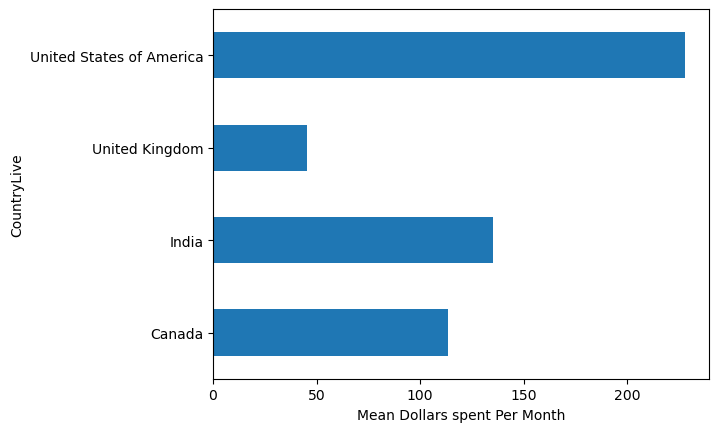

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: dollars_per_month, dtype: float64


In [493]:
# Group by `CountryLive` and calculate average values by country for `dollars_per_month`
country = survey_top.groupby(by='CountryLive')
mean_dollars = country['dollars_per_month'].agg(np.mean)
mean_dollars.plot.barh(xlabel='Mean Dollars spent Per Month')
plt.show()

print(mean_dollars)

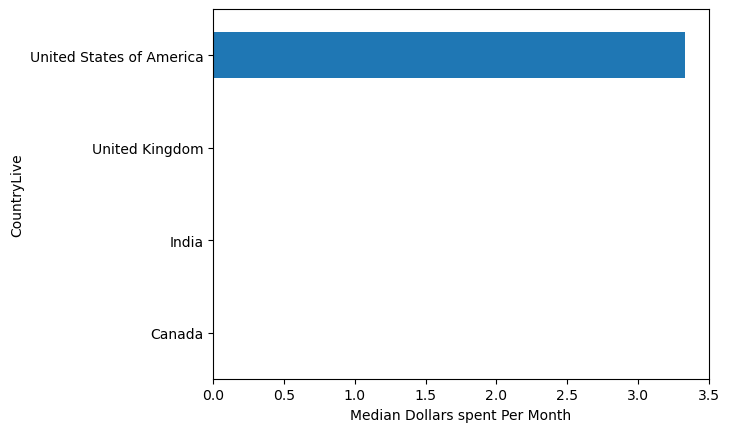

CountryLive
Canada                      0.000000
India                       0.000000
United Kingdom              0.000000
United States of America    3.333333
Name: dollars_per_month, dtype: float64


In [494]:
median_dollars = country['dollars_per_month'].agg(np.median)
median_dollars.plot.barh(xlabel='Median Dollars spent Per Month')
plt.show()

print(median_dollars)

In [495]:
print(country['dollars_per_month'].max() - country['dollars_per_month'].min())

CountryLive
Canada                       5000.0
India                       10000.0
United Kingdom               1400.0
United States of America    80000.0
Name: dollars_per_month, dtype: float64


Looking only at the mean values generated for each country, we see some resonable values. We might expect, however, for the average amount of money spent in the UK and Canada to be higher than India, given that those two countries have higher GDP per capita. Furthermore, looking at the median and inspecting the `dollars_per_month` column, we notice that there are some significant outliers and zero values in these data. Additionally, each country (especially the United States) has a very large range of values (80,000!).

Perhaps we do not have representative data for the UK, Canada, and India. We know that we have some outliers and maybe that data was input from the wrong question on the survey. It is also possible these data are correct. 

Let's generate some boxplots to verify outliers.

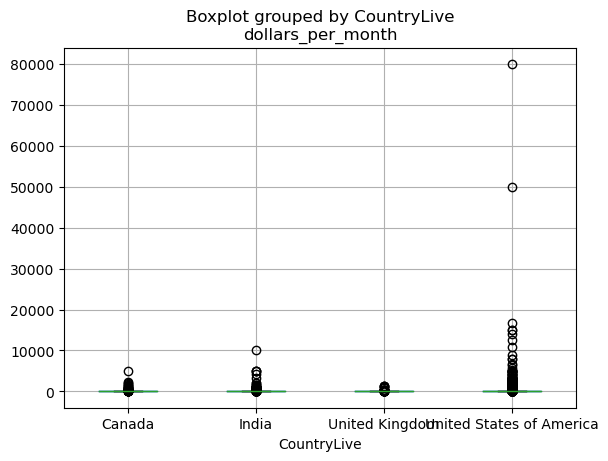

In [496]:
# Generate boxplot for `dollars_per_month` column
survey_top.boxplot(column='dollars_per_month', by='CountryLive')
plt.show()

There are extreme outliers for the United States (50,000 and 80,000) as well as for India. There are not as clear outliers for the UK and Canada.

Let's start by eliminating outliers larger than $10,000 per month from all countries. We will then compute the mean values per country again and evaluate further the need for altering the threshold for outliers. 

In [497]:
# Eliminate outliers for US, India and Canada
survey_top = survey_top[survey_top['dollars_per_month'] < 10000].copy()


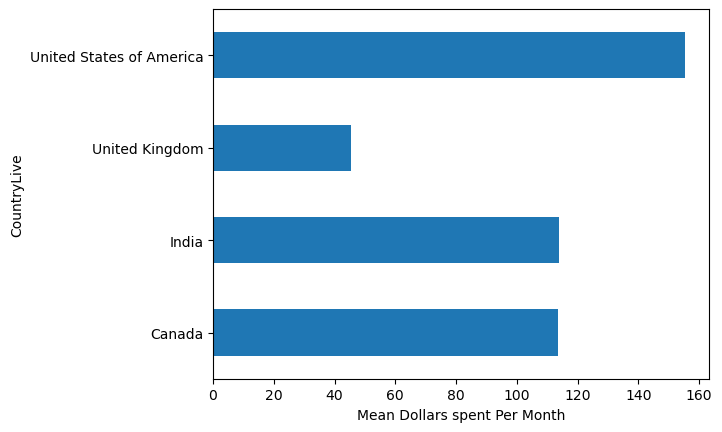

CountryLive
Canada                      113.510961
India                       113.748387
United Kingdom               45.534443
United States of America    155.459187
Name: dollars_per_month, dtype: float64


In [498]:
# Recompute mean values
country_up = survey_top.groupby(by='CountryLive')
mean_dollars = country_up['dollars_per_month'].agg(np.mean)
mean_dollars.plot.barh(xlabel='Mean Dollars spent Per Month')
plt.show()

print(mean_dollars)

The average dollar amount spent per month remains relatiely high for India, Canada, and the US. Inda and Canada are now almost exactly the same. Before making any conclusions, we will repeat this process and inspect outliers to better understand what rows we can and cannot drop.

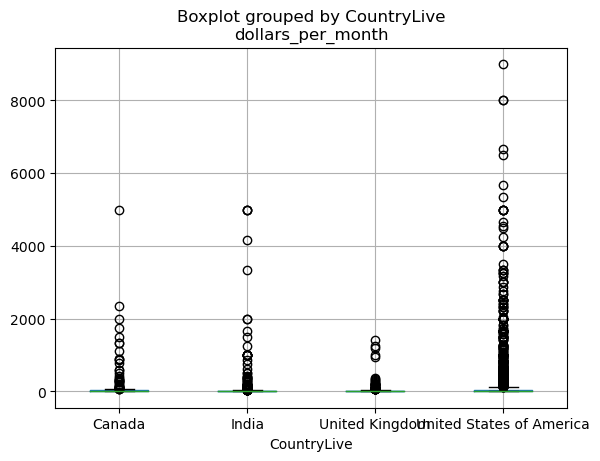

In [499]:
survey_top.boxplot(column='dollars_per_month', by='CountryLive')
plt.show()

In [500]:
pd.options.display.max_columns = 150
survey_top[(survey_top['dollars_per_month'] == 5000) & (survey_top['CountryLive'] == 'India')]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,dollars_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,15 to 29 minutes,India,India,software development and IT,NaN,Employed for wages,NaN,500000.0,1.0,NaN,male,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,20.0,a6a5597bbbc2c282386d6675641b744a,da7bbb54a8b26a379707be56b6c51e65,300000.0,0.0,0.0,0.0,0.0,more than 12 months from now,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,work for a multinational corporation,1.0,"User Experience Designer, Back-End Web Devel...",in an office with other developers,Marathi,married or domestic partnership,5000.0,1.0,c47a447b5d,2017-03-26 14:06:48,2017-03-26 14:02:41,2017-03-26 14:13:13,2017-03-26 14:07:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not listened to anything yet.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,

In [501]:
survey_top[survey_top['dollars_per_month'] >= 5000]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,dollars_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

On closer inspection, we see that some of the outliers may be errors. The three outliers from India did not attend a bootcamp and it is unclear where they might have spent so much money on programming learning. Furthermore, the question raised by this inspection is that are expensive bootcamps relevant to our analysis. Many bootcamps are much different from e-learning resources like fCC and CodeCademy, not to mention much more expensive. 

Based on our given problem, we will drop the outliers from India (as we cannot easily determine if there is a valid reason for the high expenditure) and the outliers over $6,000 per month for the US. We will also drop the $5,000 per month outlier from Canada as this is much higher than the rest of the data for Canada (and attended a bootcampt that costs $10,000).

In [502]:
# Drop rows with $5,000 per month for India, Canada and anything over that for US
survey_top = survey_top[survey_top['dollars_per_month'] < 6000].copy()
survey_top = survey_top[(survey_top['dollars_per_month'] < 3000) | (survey_top['CountryLive'].isin(
    ['United States of America', 'United Kingdom']))].copy()

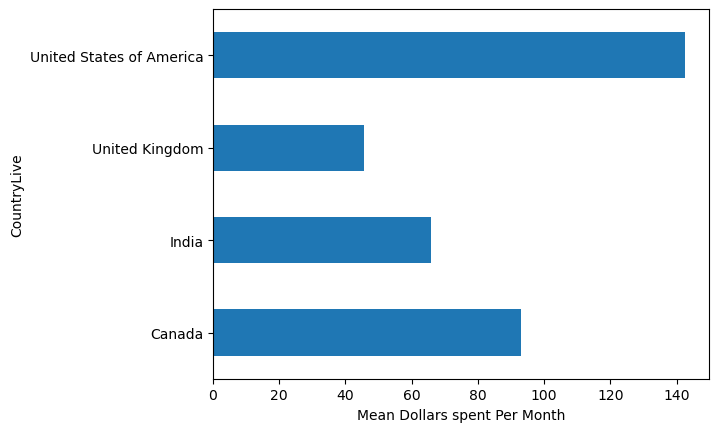

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: dollars_per_month, dtype: float64


In [503]:
# Recompute mean values
country_up = survey_top.groupby(by='CountryLive')
mean_dollars = country_up['dollars_per_month'].agg(np.mean)
mean_dollars.plot.barh(xlabel='Mean Dollars spent Per Month')
plt.show()

print(mean_dollars)

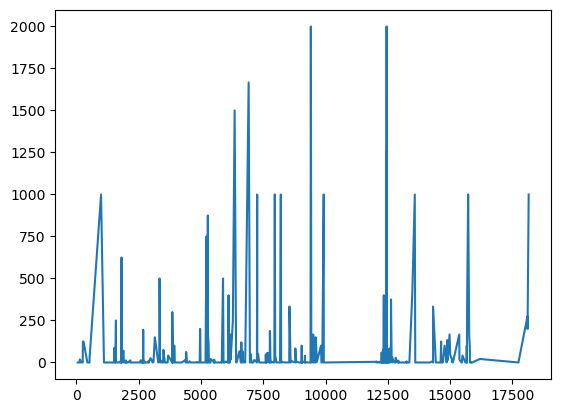

Number of respondents spending more than $50 per month in India:  73
Number of respondents spending more than $50 per month in Canada:  39


In [514]:
# Plot distribution of values for India in `dollars_per_month`
survey_top.loc[survey_top['CountryLive'] == "India", 'dollars_per_month'].plot()
plt.show()

# Find number of respondents spending more than $50 per month in Inida and Canada
more_50_bool = ((survey_top['CountryLive'] == "India") & (survey_top['dollars_per_month'] > 50)).sum()
print("Number of respondents spending more than $50 per month in India: ", more_50_bool)

more_50_bool_c = ((survey_top['CountryLive'] == "Canada") & (survey_top['dollars_per_month'] > 50)).sum()
print("Number of respondents spending more than $50 per month in Canada: ", more_50_bool_c)

## 3. Conclusions

Finally, we have settled on final numbers for the average dollar amount spent per month for India, Canada, the US, and the UK. 

| Country | Avg $/Month |
| :--- | ---: |
|Canada | 93.065400|
|India | 65.758763 |
|United Kingdom |  45.534443 |
|United States of America | 142.654608 |


Our primary goal for this project is to recommend the two best markets to advertise our programming e-learning platform. With a focus on web and mobile development, our company also provides learning resources for fields like data science, game design, and software development. Using data from a recent survey ran by freeCodeCamp, we arrived at the above numbers for average dollar amounts spent by our target audiences in four countries. These countries represent the four largest respondent groups in the previously mentioned survey. 

There are several factors to consider when deciding what the best market for advertising is for us:
* How many likely learners live in a given market.
* How much they are willing to spend on learning.
* Whether English is a commonly spoken language in a given market.

The United States, by far, showed the highest concentration of potential customers, the highest average spent per month, and the largest interest in online learning. With confidence, we can say that the United States is the best market to advertise in for our e-learning products. 

The question remains, what is the second-best market to advertise in? 

We have two possible choices for the second target market: India and Canada. Here are some details from our analysis of the two markets:

| Statistic | India | Canada |
| :--- | ---: | ---: |
| No. Respondents in Data | 528 | 260 |
| Avg. $ Spent Per Month | $65 | $93 |
| No. Spending > $50 / Month | 73 (13%) | 39 (15%) |  

Basing the decision simply on the average dollar amount spent per month, we may go with Canada as our second choice. That is not, however, likely enough information on which to base our decision. From these data, Canada has roughly half the possible customers as India. The average amount spent per month in India is roughly \$30 lower than Canada, however, that is still higher than our products price per month (\$59). The percentage of people spending more than $50 per month in India and Canada is around the same (13-15%). 

Based on these results, there are several possible recommendations we can make:
1. India, with a larger number of possible customers, high enough average dollar amount spent per month, and similar percentage of customers spending more than $50 per month, is a reasonable choice for our second market. 
2. Canada, while having a lower nunber of possible customers, has a higher average dollar amount spent per month, is geographically closer to the United States and shares more overlap in culture and advertising trends, and has a similar percentage of customers spending more than $50 per month, is a reasonable choice for our second market. 
3. Regardless of which secondary market we choose, unequally splitting our advertising funding between the US and the second market may be a good option. There is significantly more potential customers in the US and it has the highest average dollars spent per month of all markets (by quite a lot). Furthermore, the United States is a large market and those potential customers are spread throughout multiple platforms, cities, and states. Allocating more funding may reach more customers in the US and therefore generate more revenue for our platform. 
4. Following the previous point, we could also not choose a secondary market at all. Only advertising in the US may allow us to perfect our marketing strategies and reach the most potential customers possible. 

Finally, the best recommendation we can make is to use this report as a basis for a marketing team to make decisions. Without greater marketing domain knowledge, the recommendations this team makes are based soley on an incomplete understanding of market forces with a narrow focus on this particular survey. However, we are confident that this analysis serves as an excellent starting point on which to build a marketing strategy for our online learning platform. Further analysis may be comissioned by the marketing team on these data with a different set of questions. 